In [1]:
import sys
import torch
sys.path.append('..')

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
import facer
img_file = 'data/twogirls.jpg'
image = facer.hwc2bchw(facer.read_hwc(img_file)
                       ).to(device=device)  # image: 1 x 3 x h x w

face_detector = facer.face_detector('retinaface/mobilenet', device=device)
with torch.inference_mode():
    faces = face_detector(image)

In [3]:
face_aligner = facer.face_aligner('farl/ibug300w/448', device=device) # optional: "farl/wflw/448", "farl/aflw19/448"

In [4]:
with torch.inference_mode():
    faces = face_aligner(image, faces)

/opt/conda/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1678411187366/work/aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


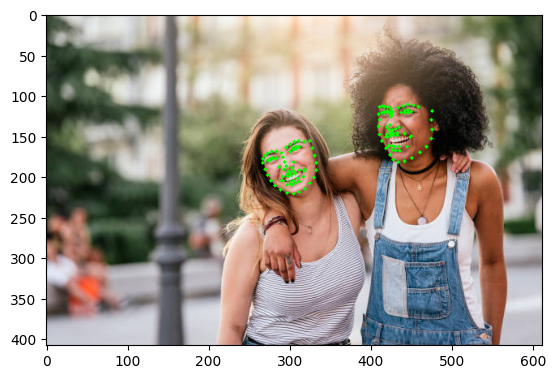

In [5]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread(img_file)[..., ::-1]
vis_img = img.copy()
for pts in faces['alignment']:
    vis_img = facer.draw_landmarks(vis_img, None, pts.cpu().numpy())
plt.imshow(vis_img)